In [1]:
%matplotlib inline
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette("muted")
import ipywidgets as widgets

import sys
sys.path.append('c:\\Users\\marco\\courses\\stats\\A - examples')
from utils import hist_normal, normal_sampling_dist

import math
import numpy as np
import scipy.stats as stats

In [2]:
# load Guerry dataset
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [6]:
df.head(3)

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26


## Population measurements

Not numerical: Region 

Not numerical: Department 

Not numerical: MainCity 



c:\Users\marco\courses\stats\A - examples\utils.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(20, 10))


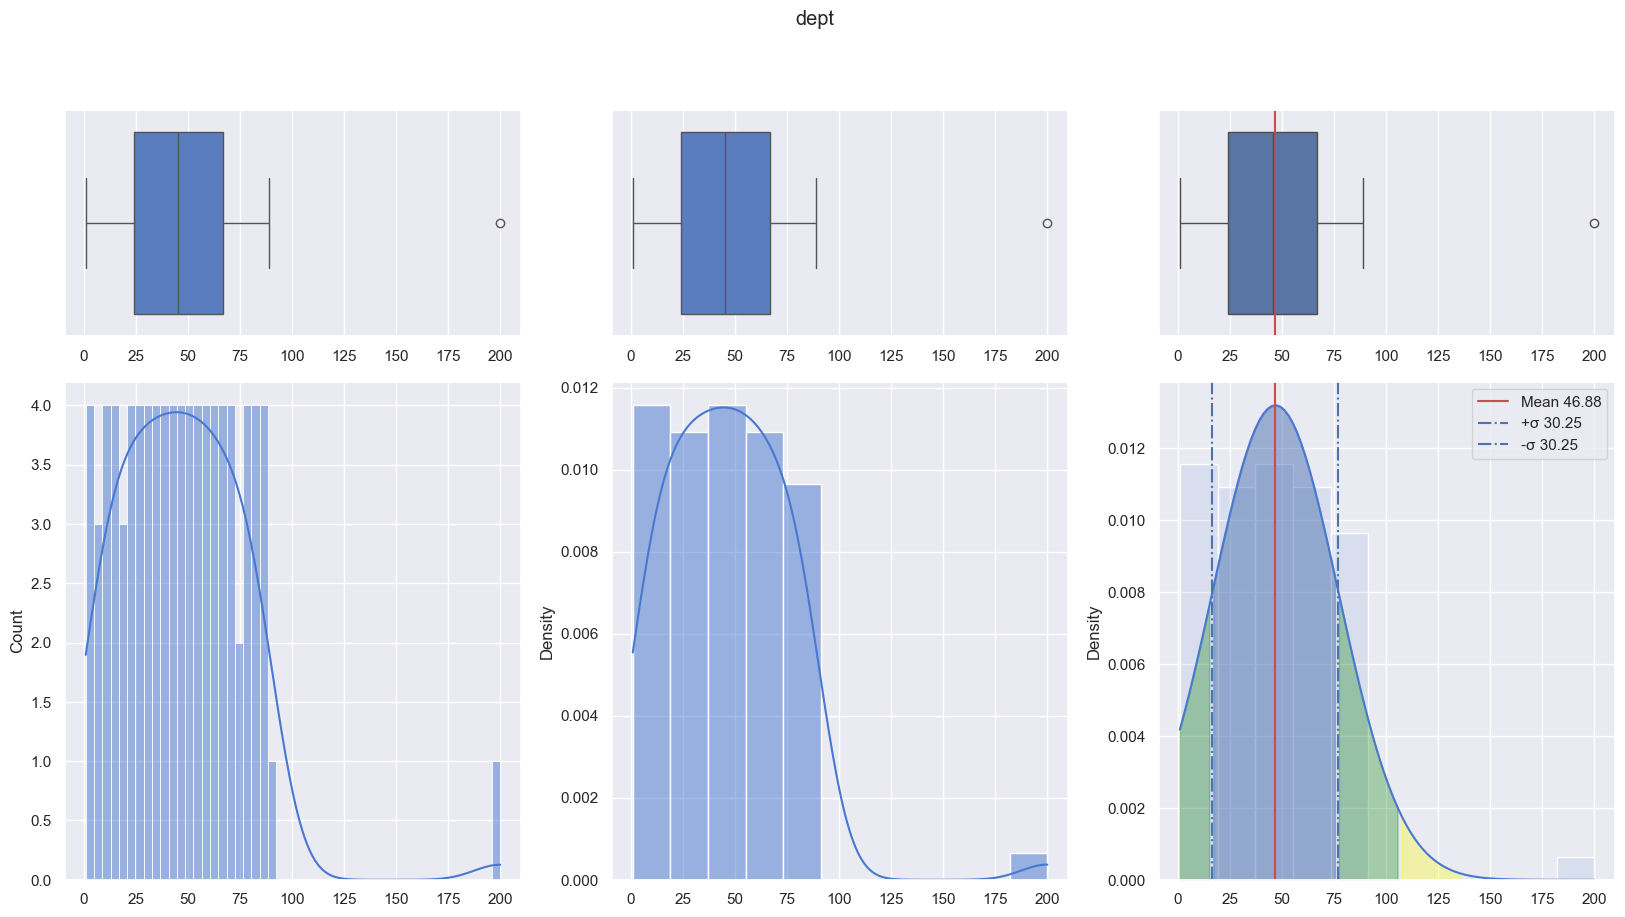

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

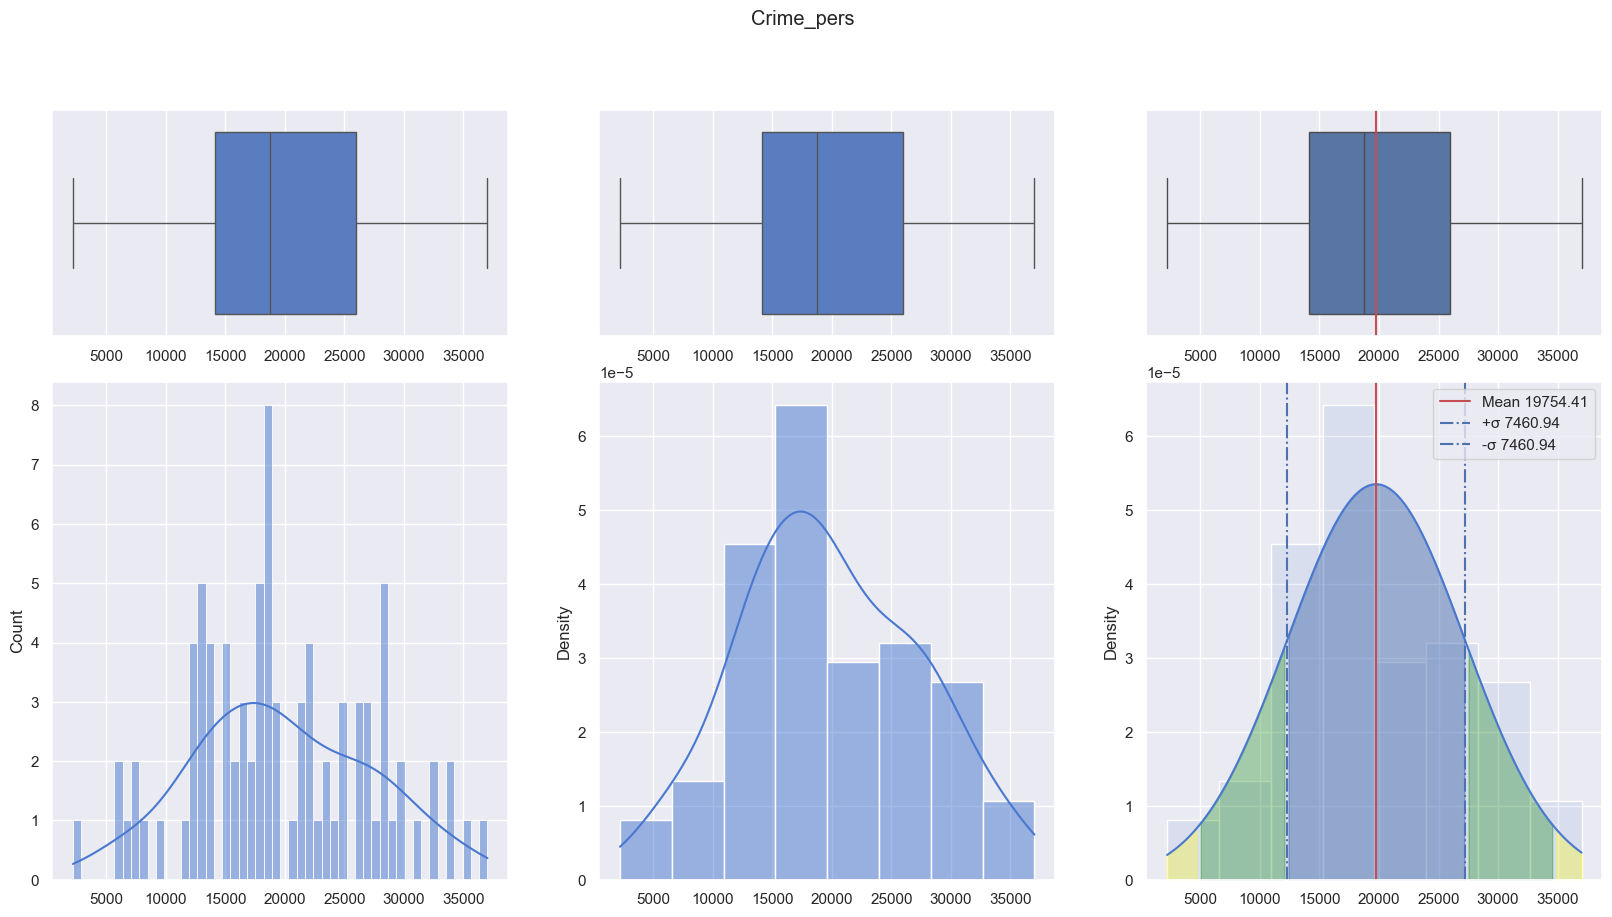

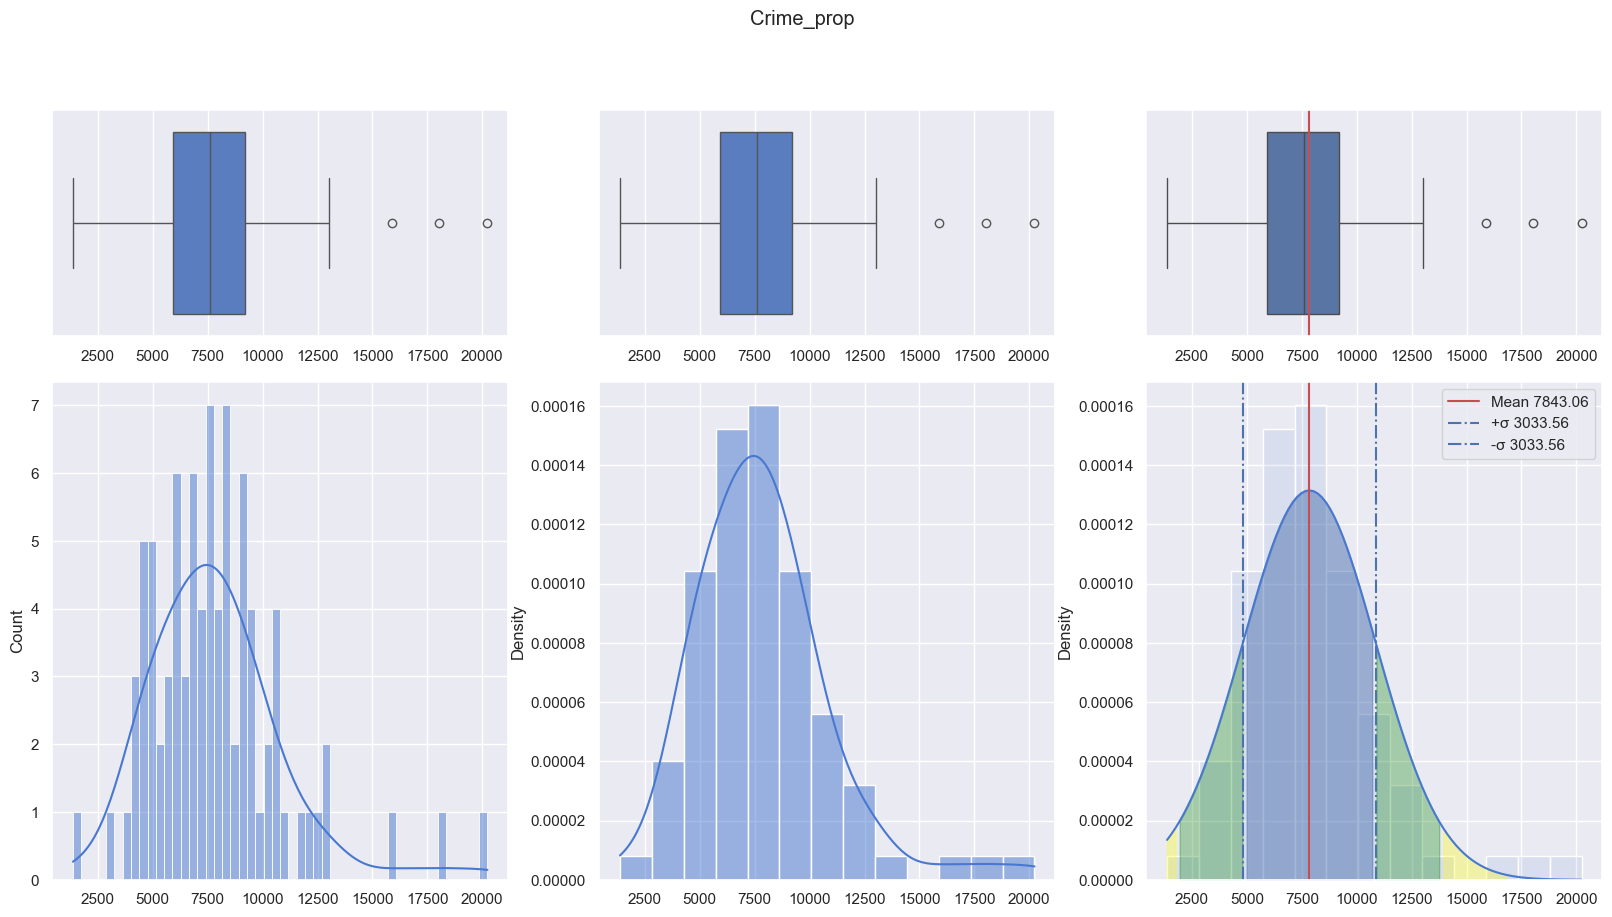

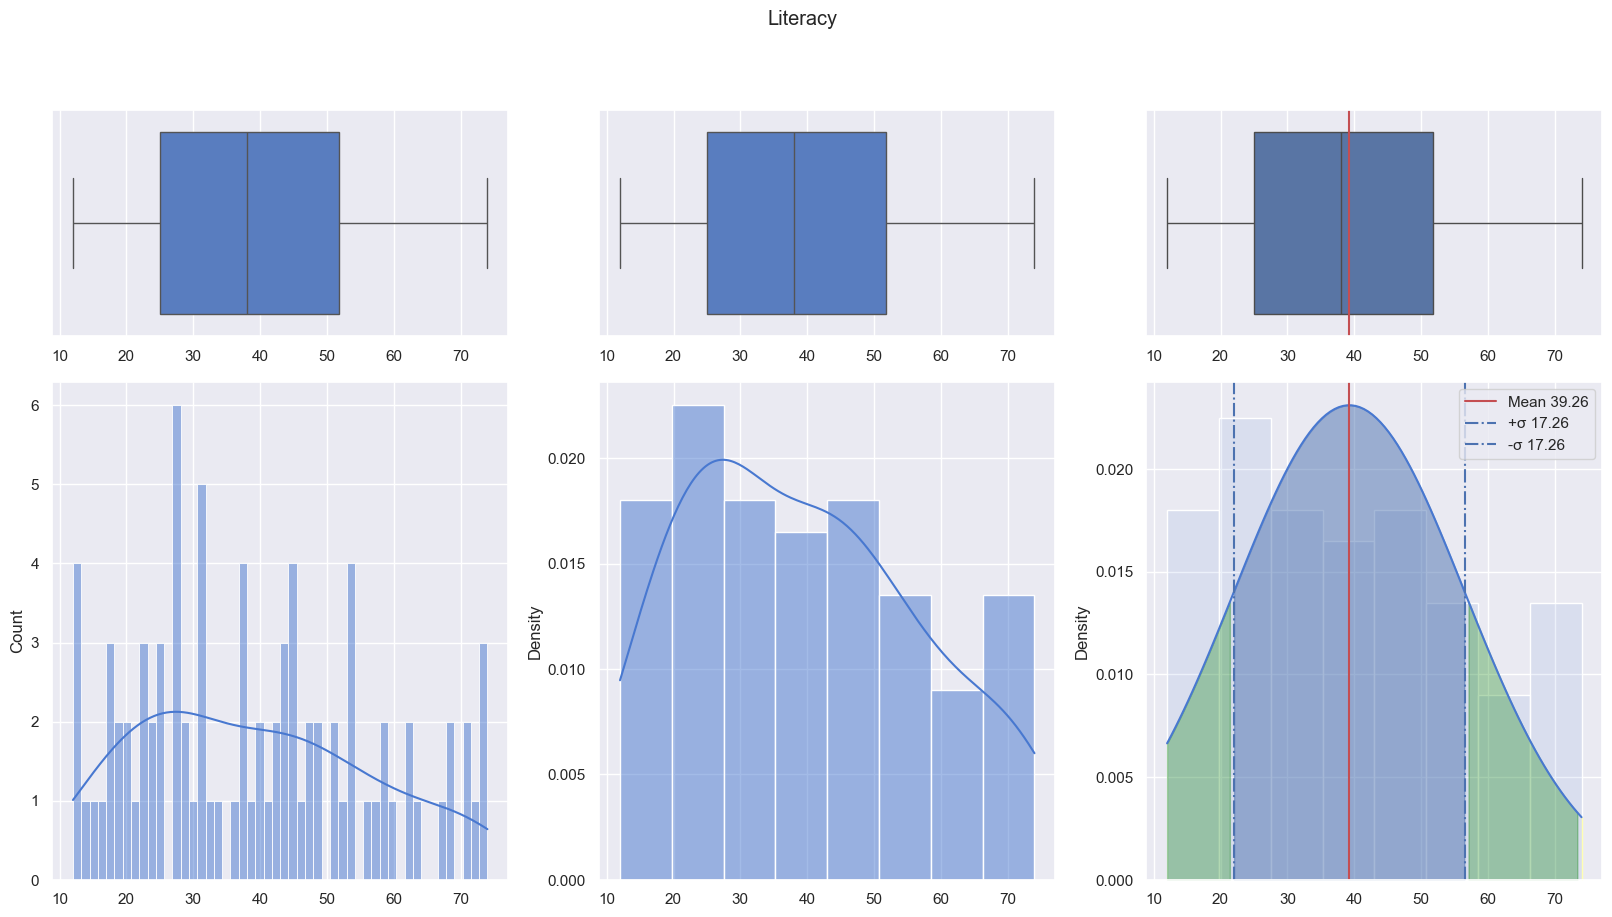

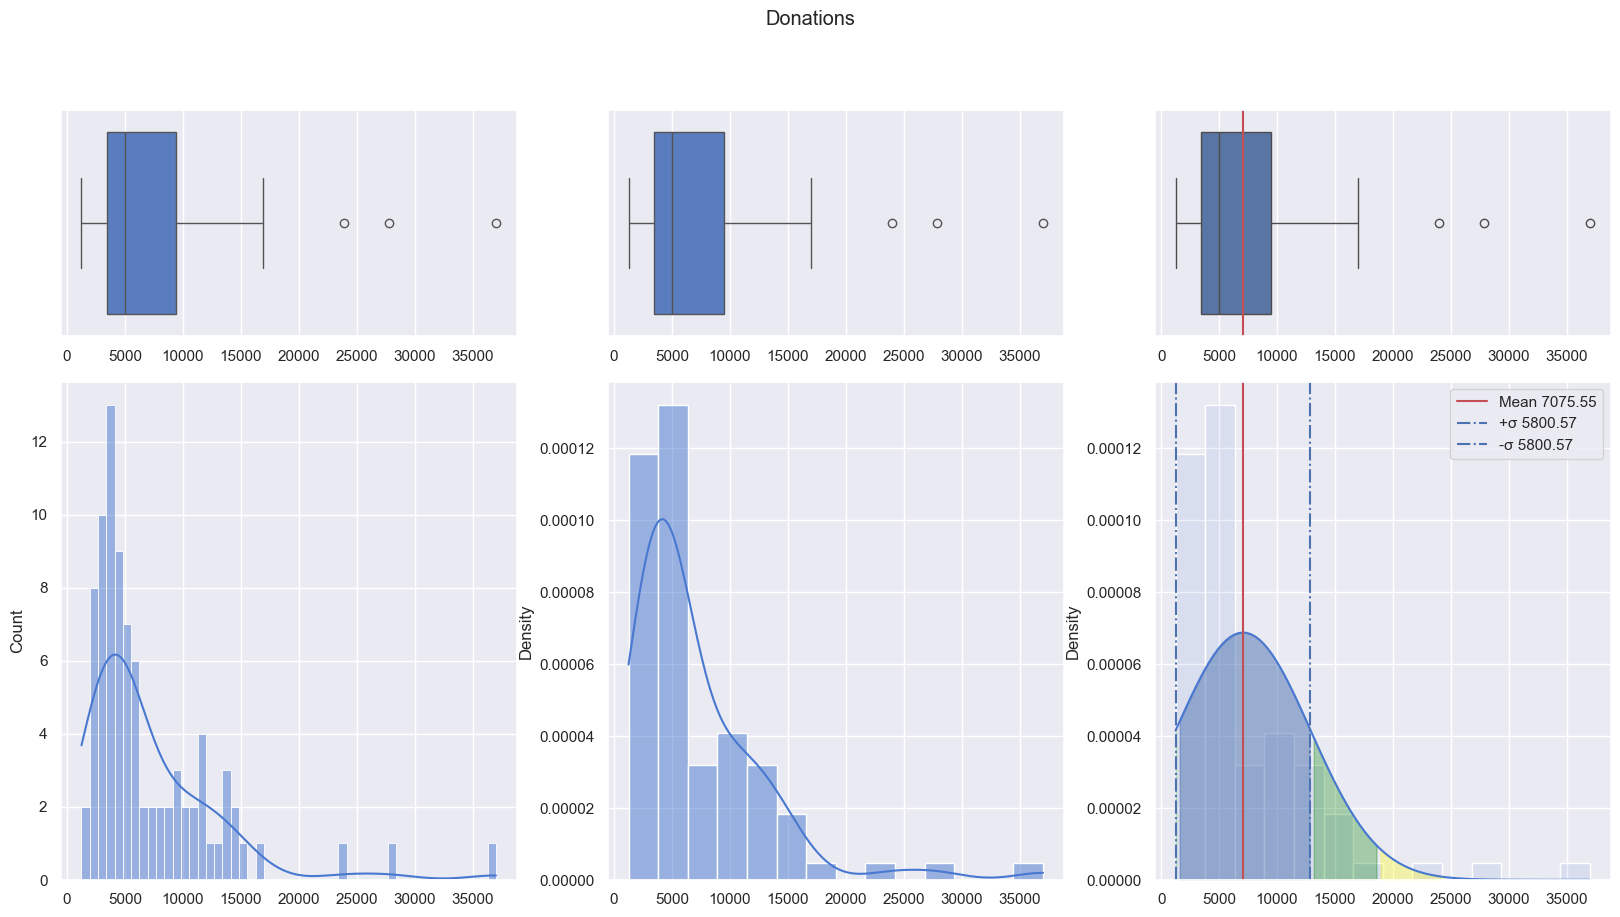

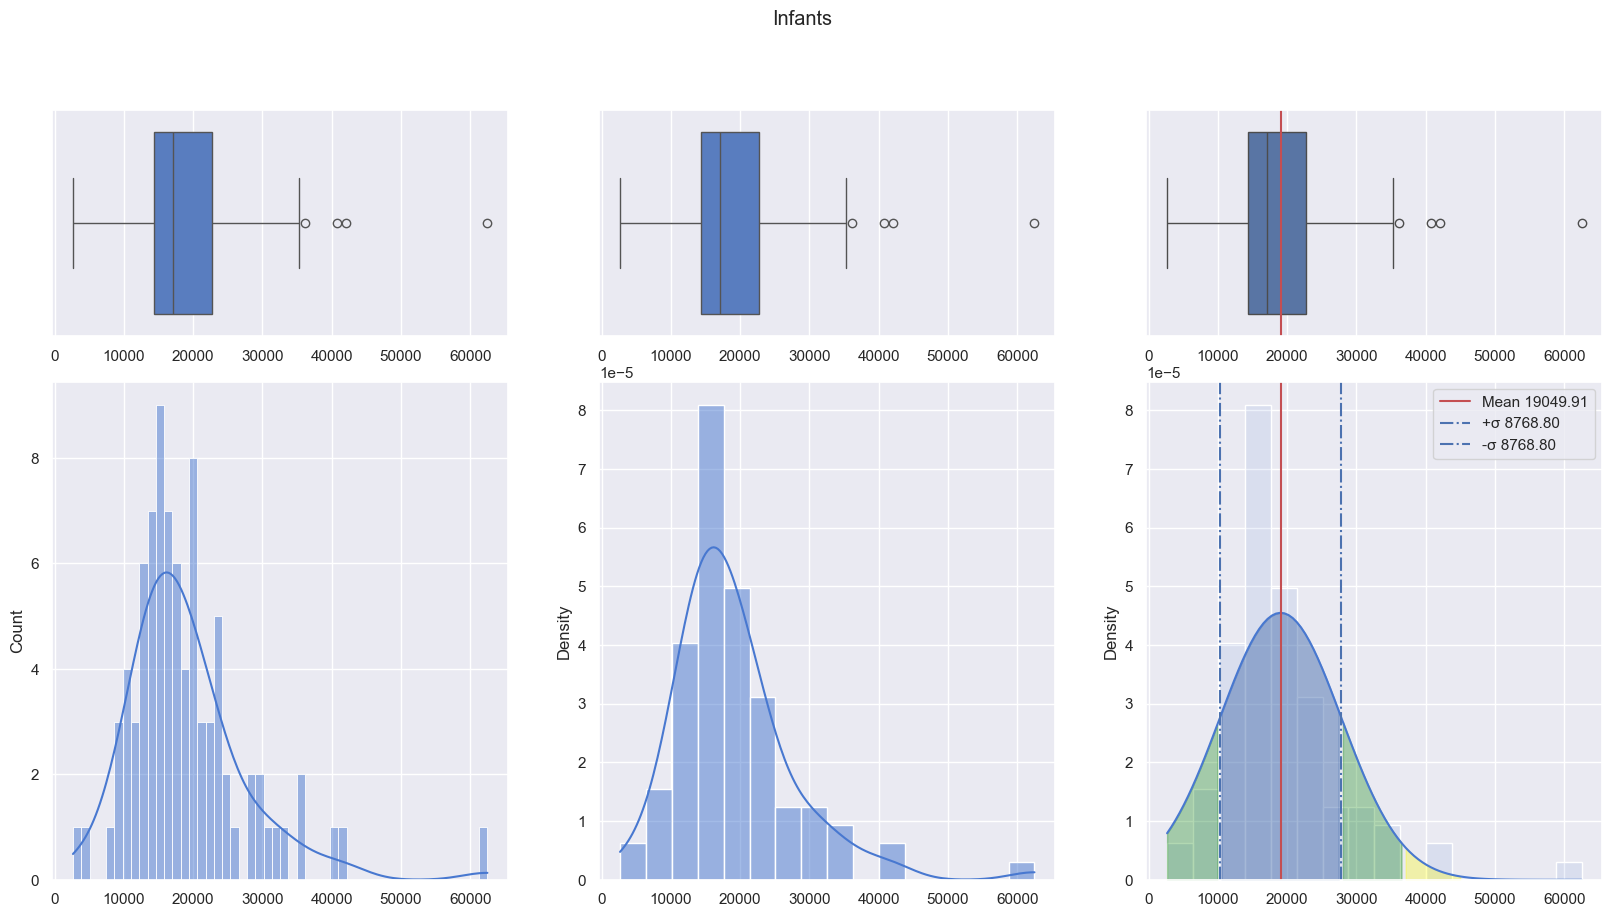

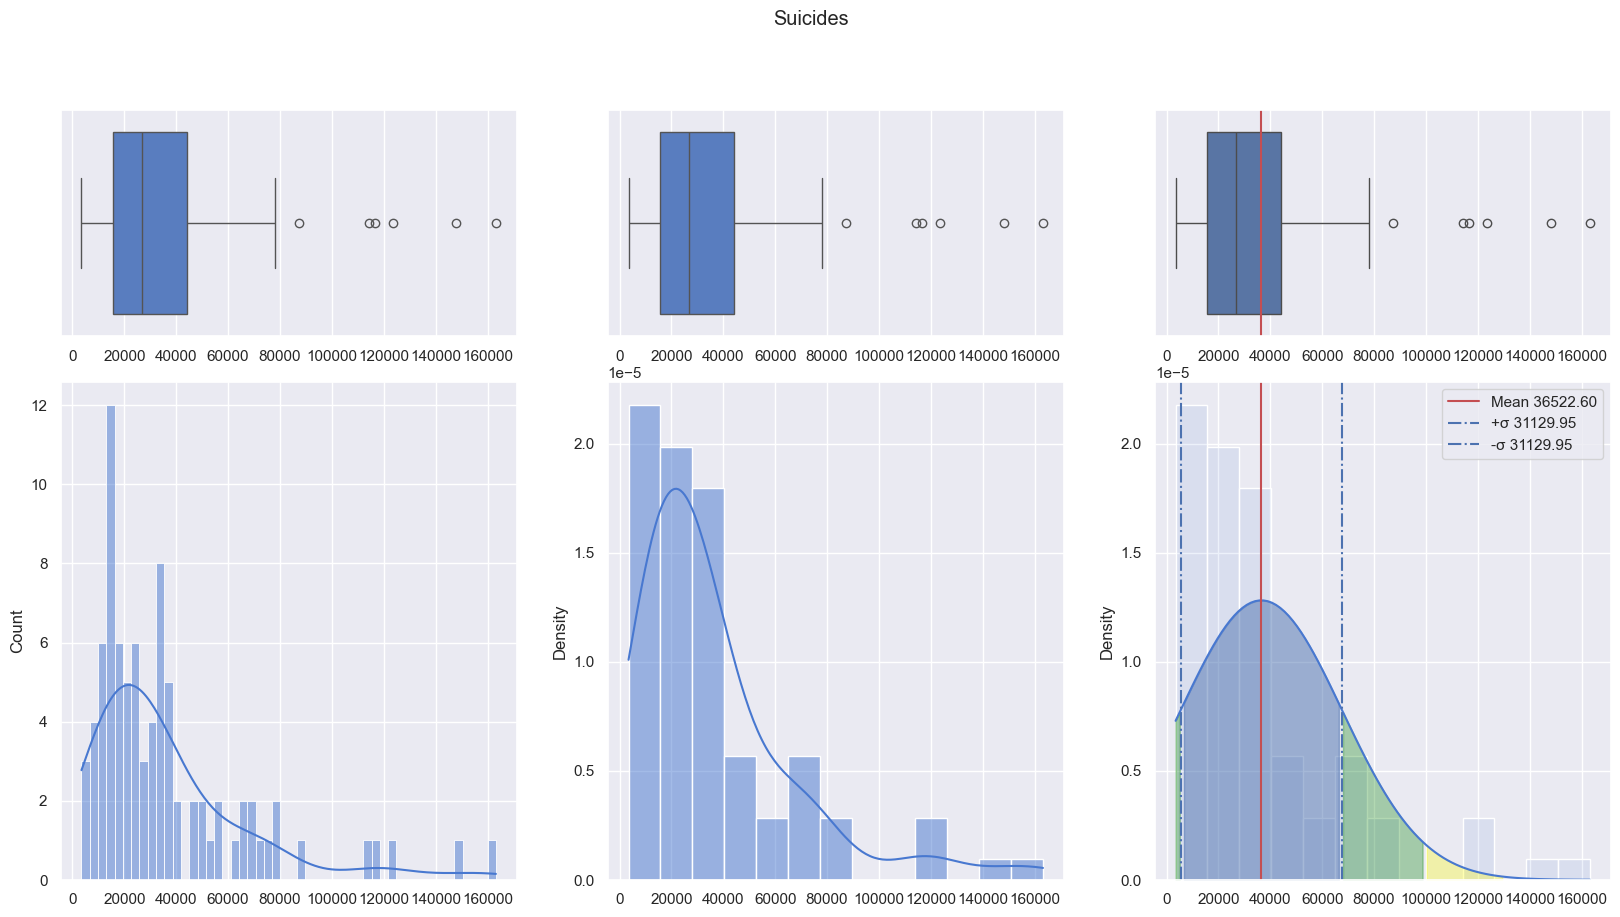

<Figure size 2000x1000 with 0 Axes>

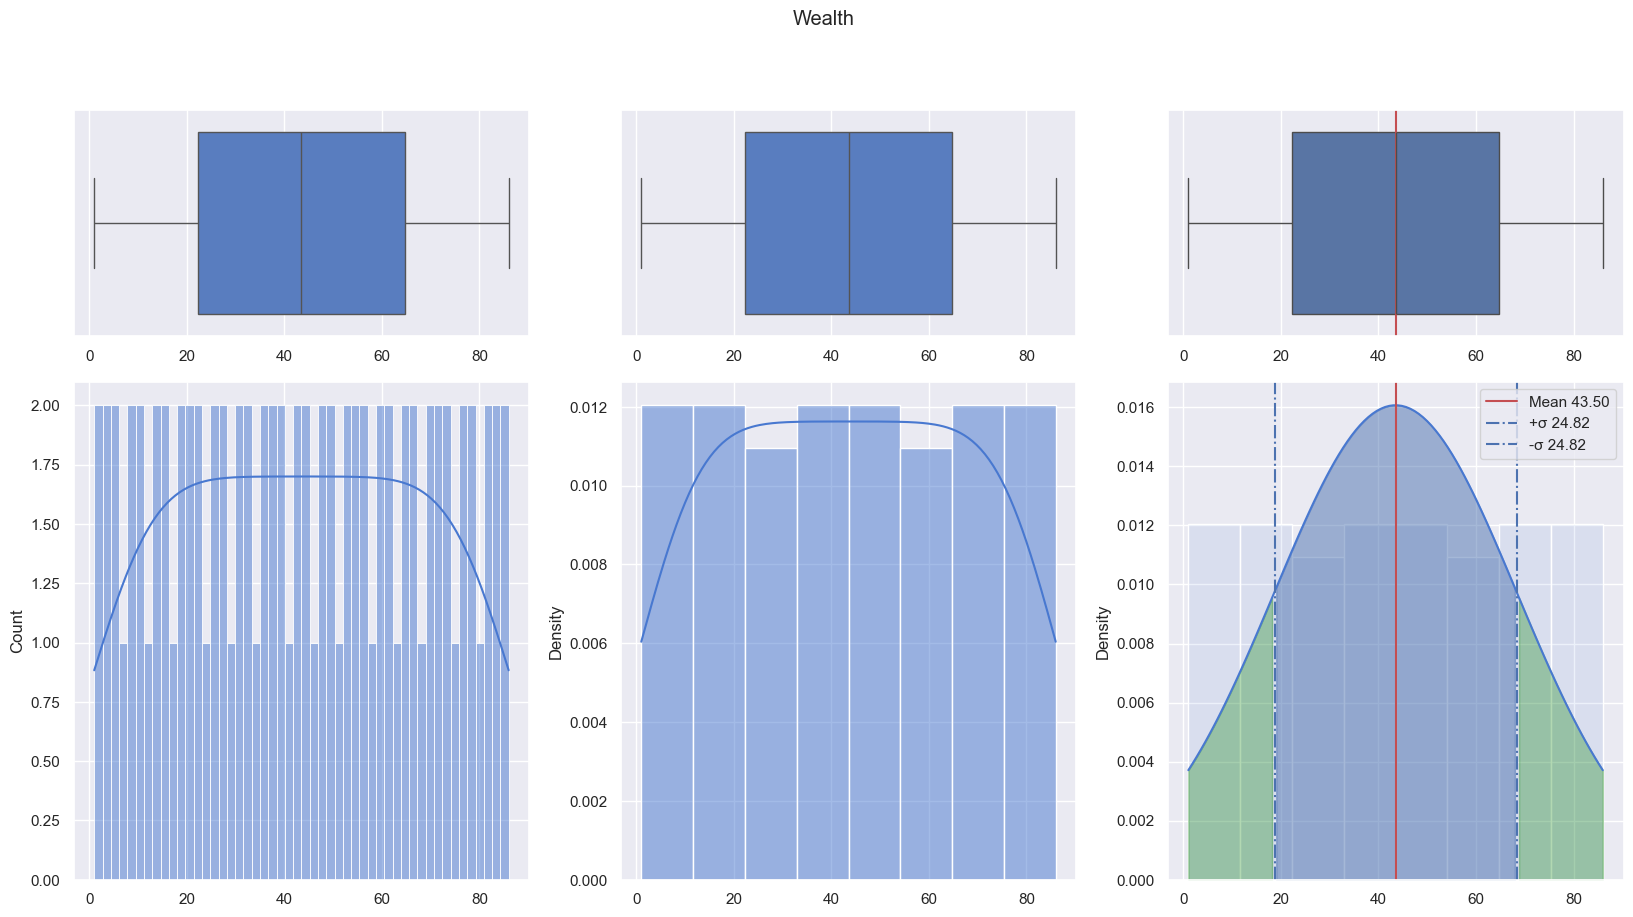

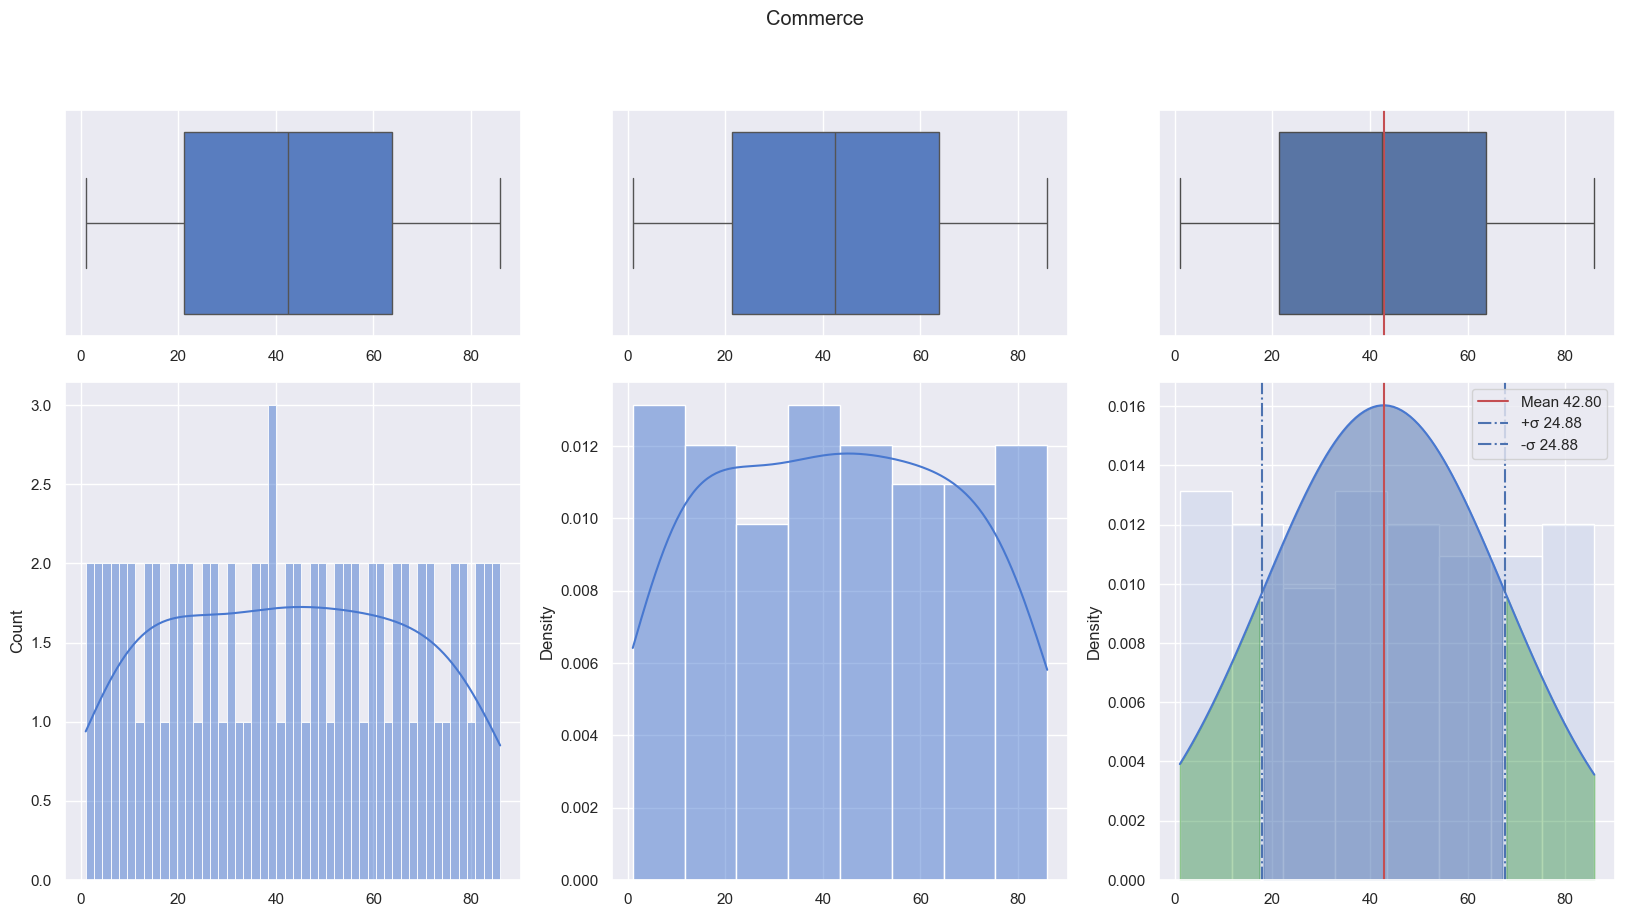

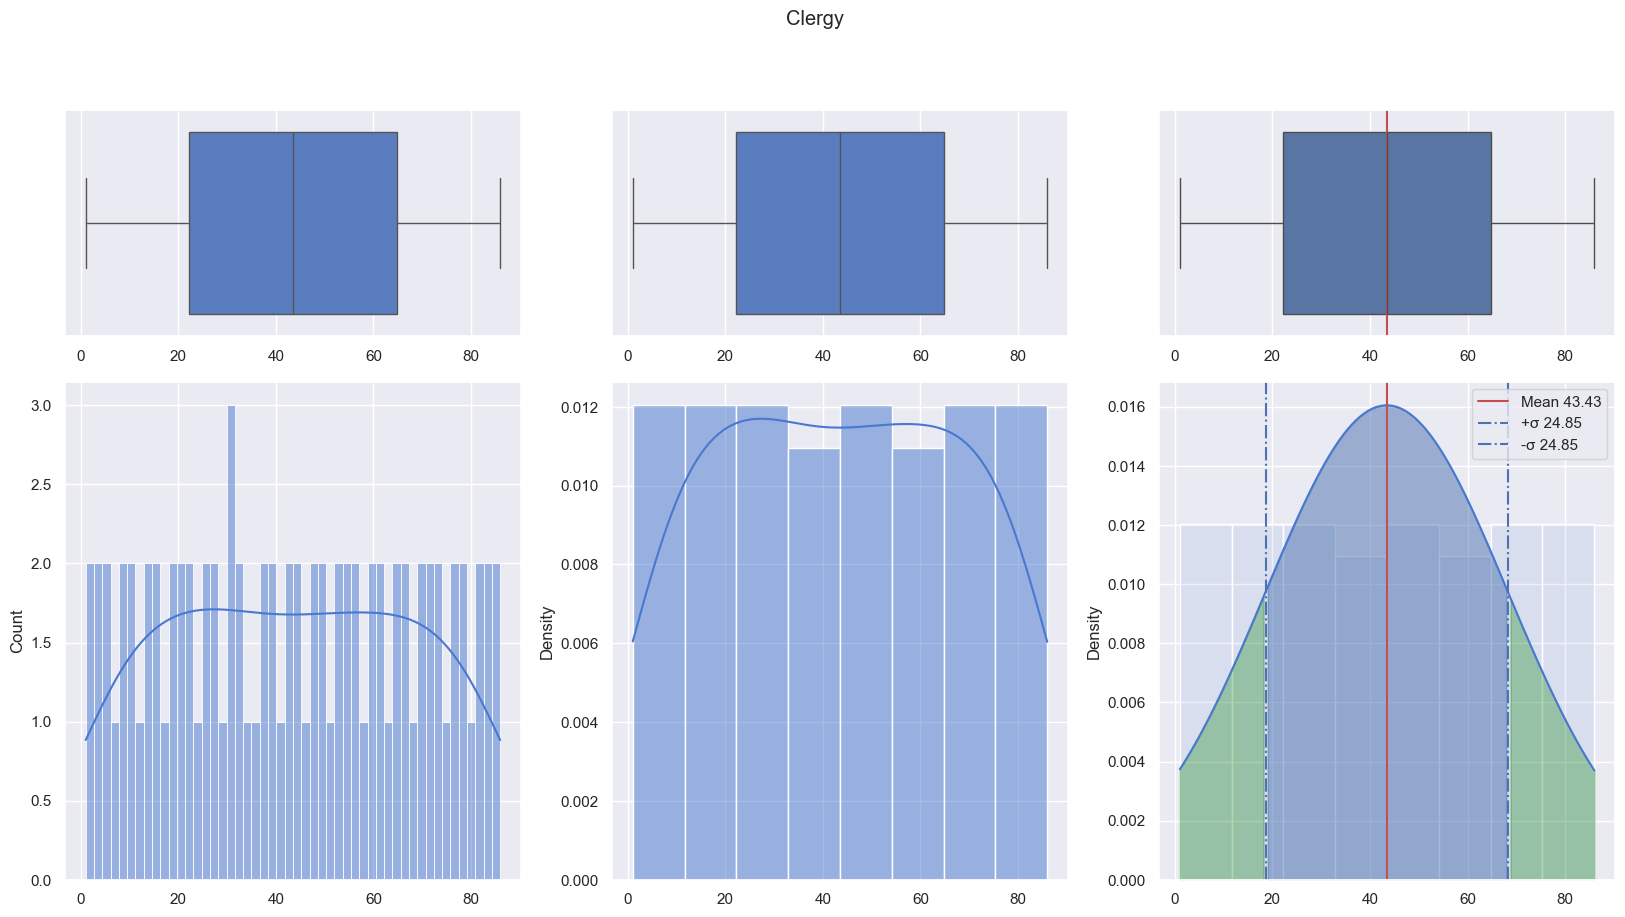

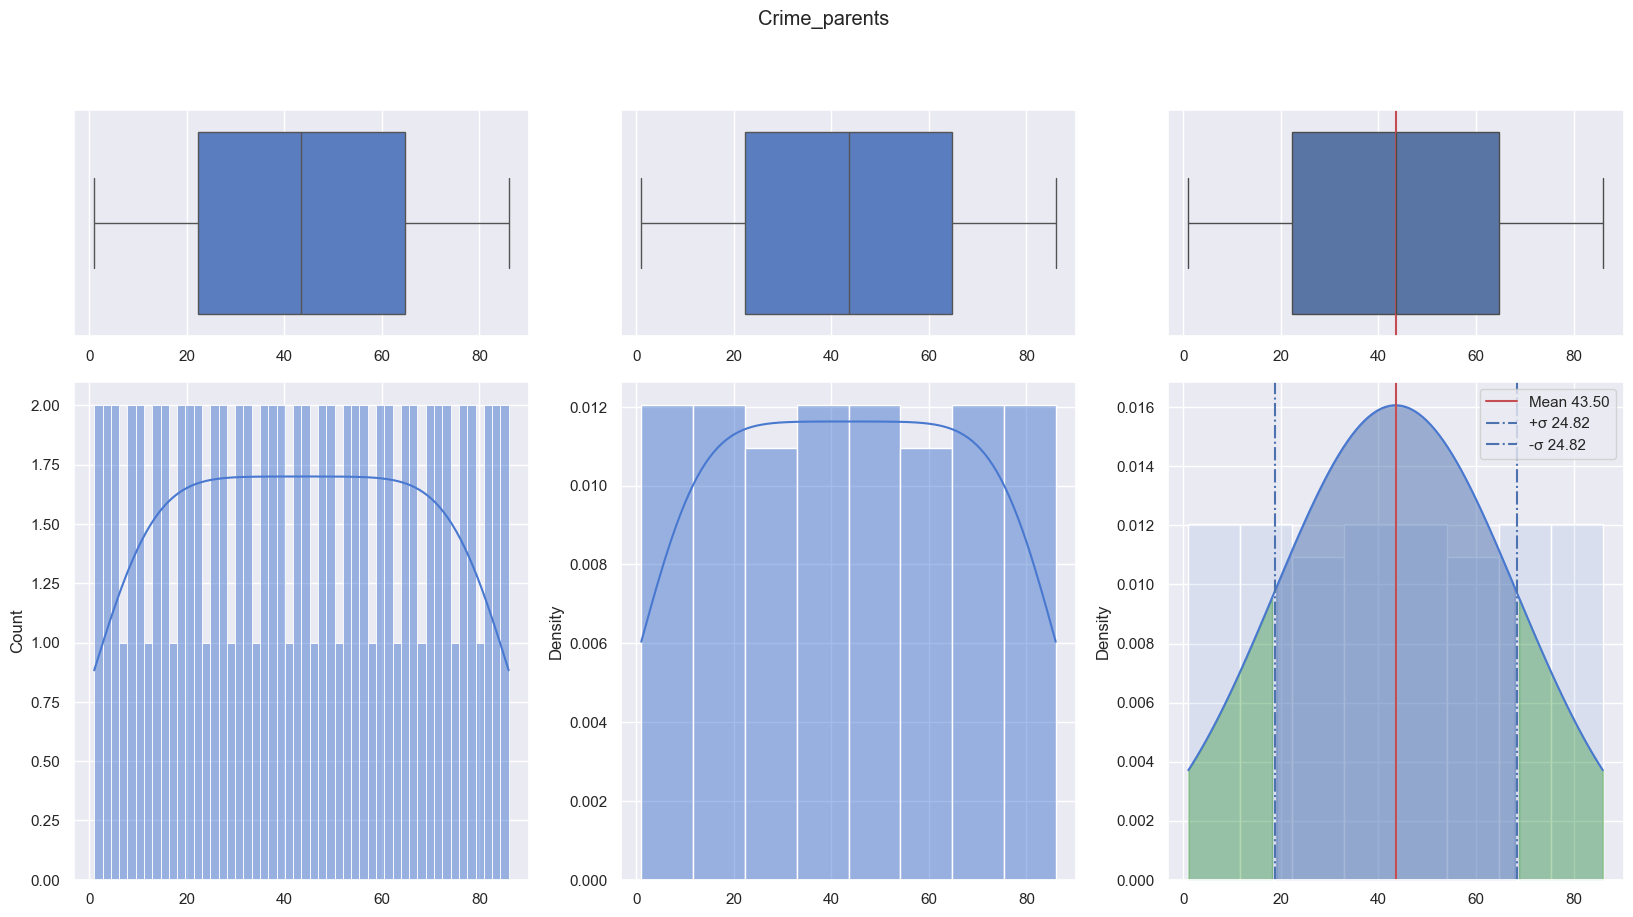

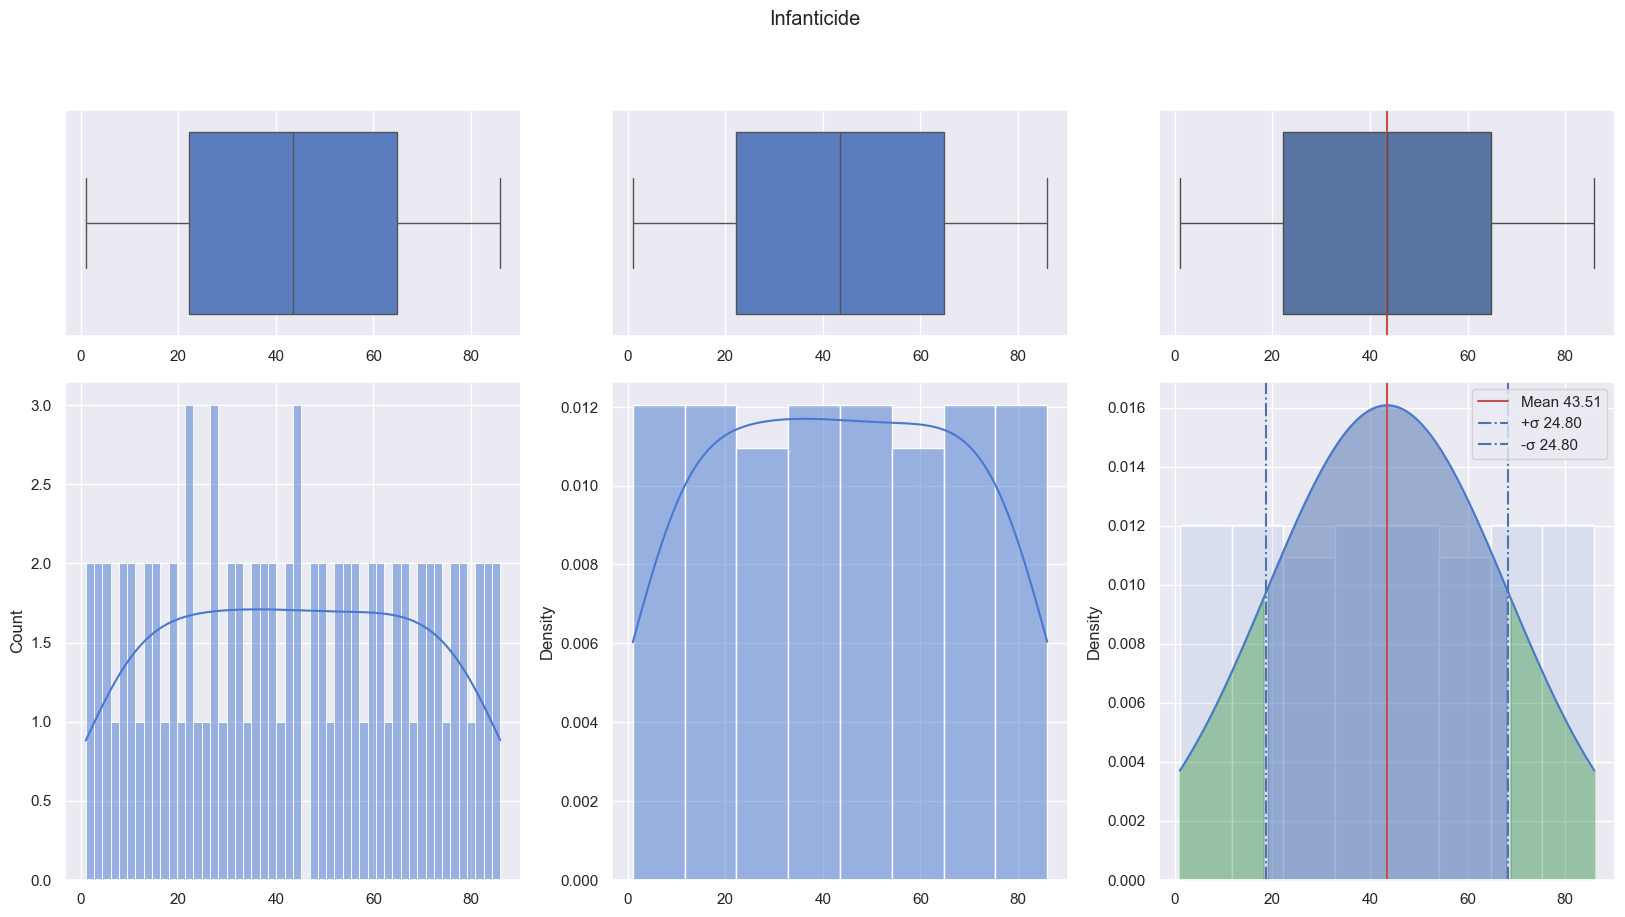

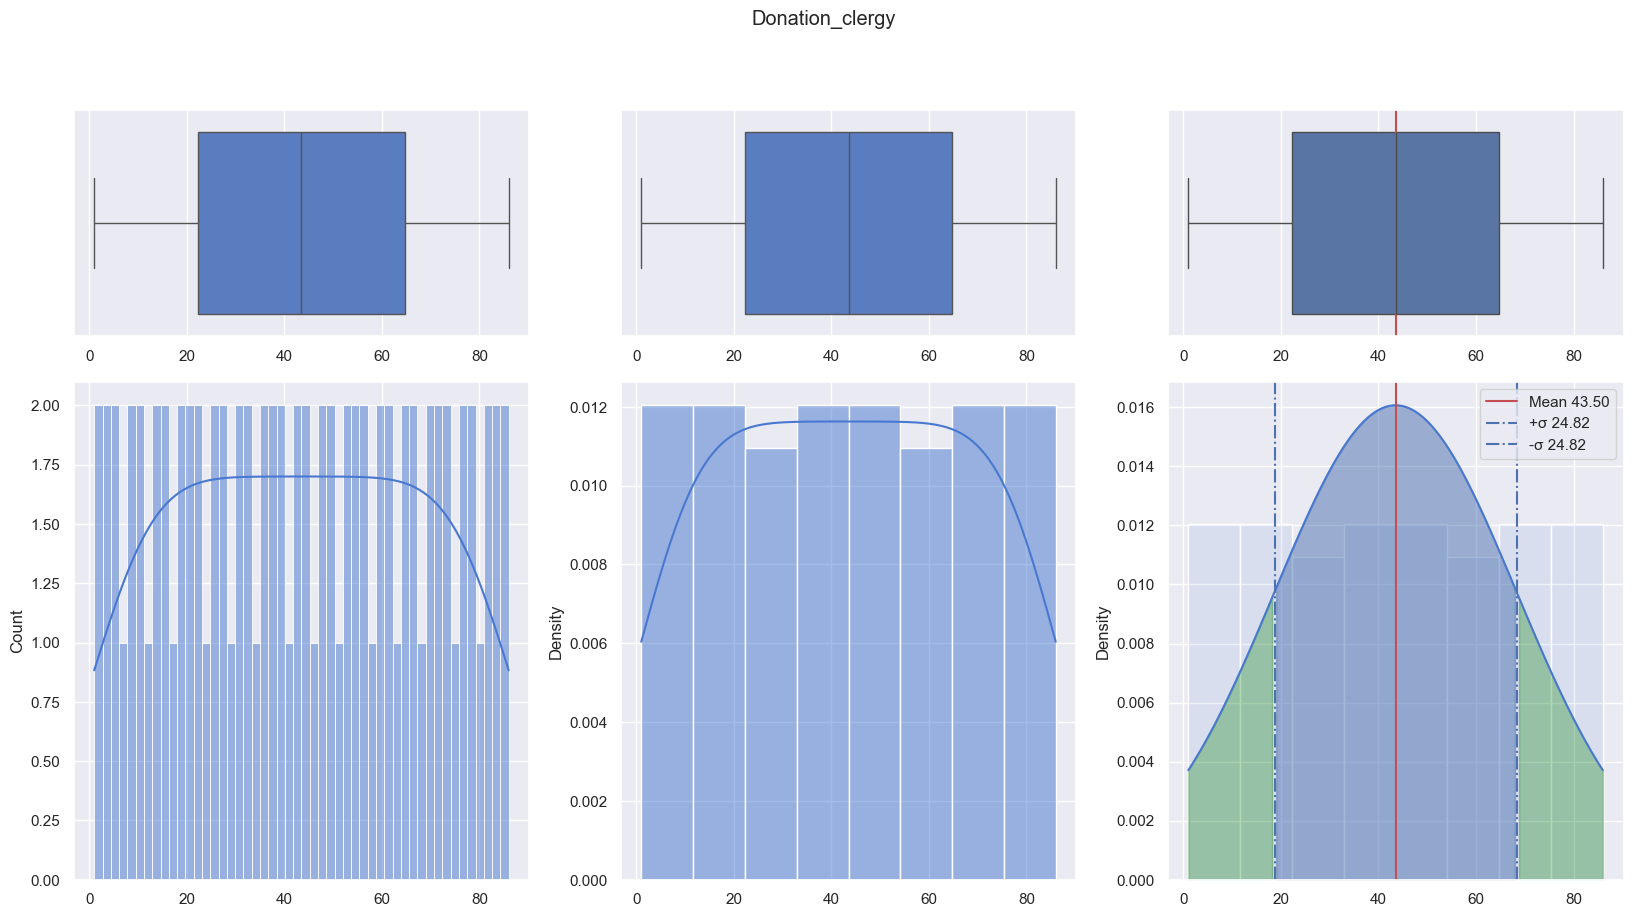

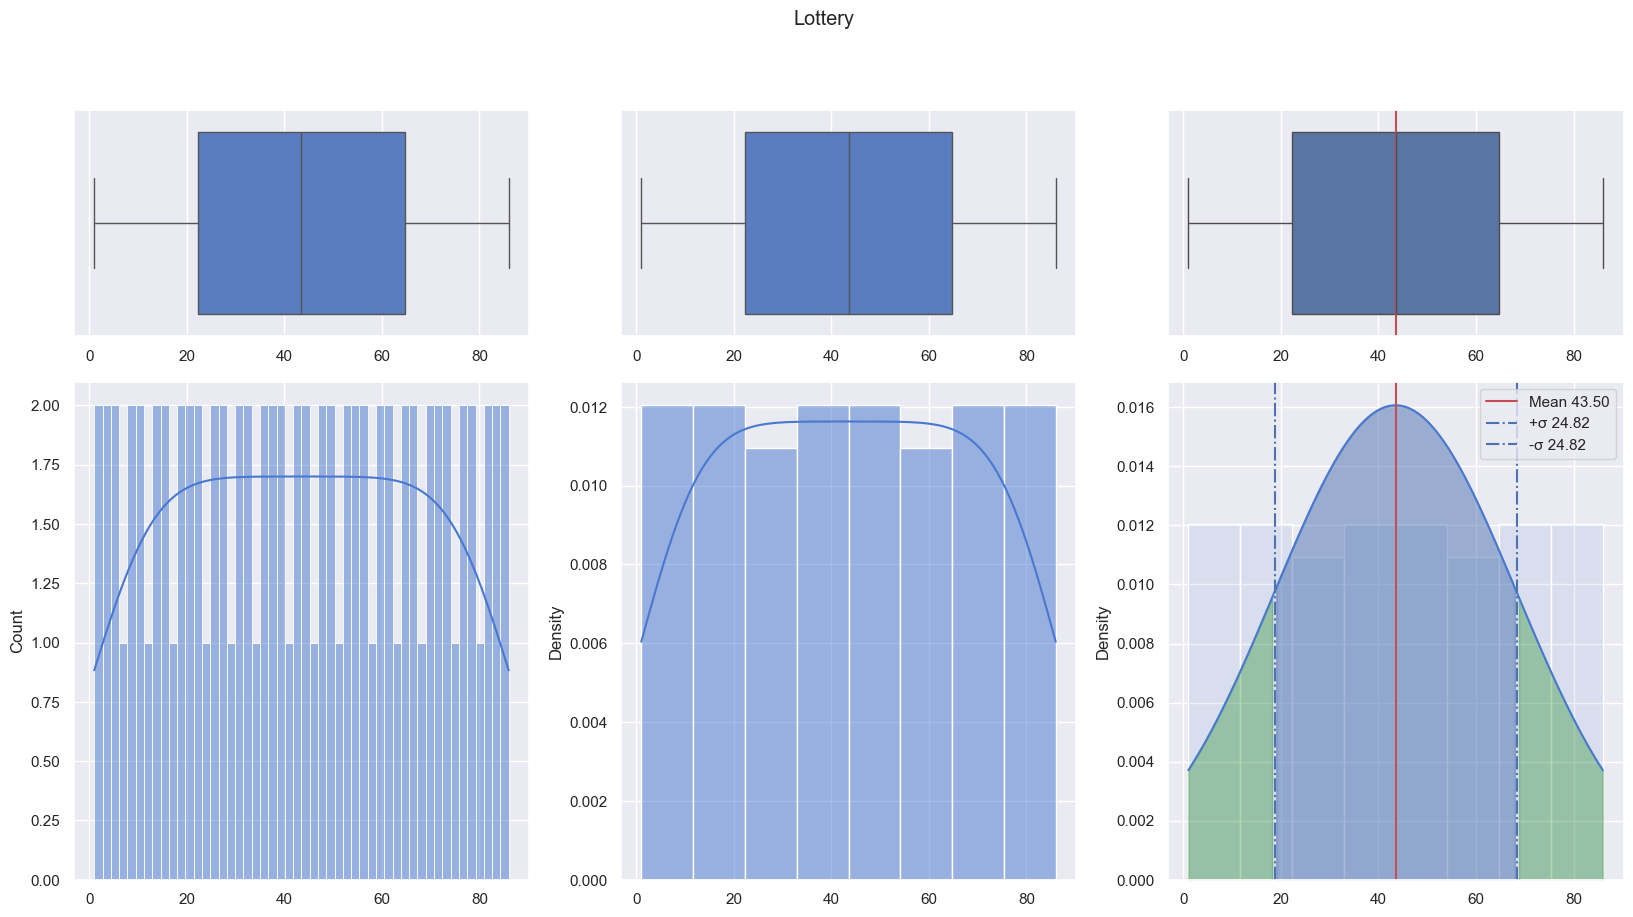

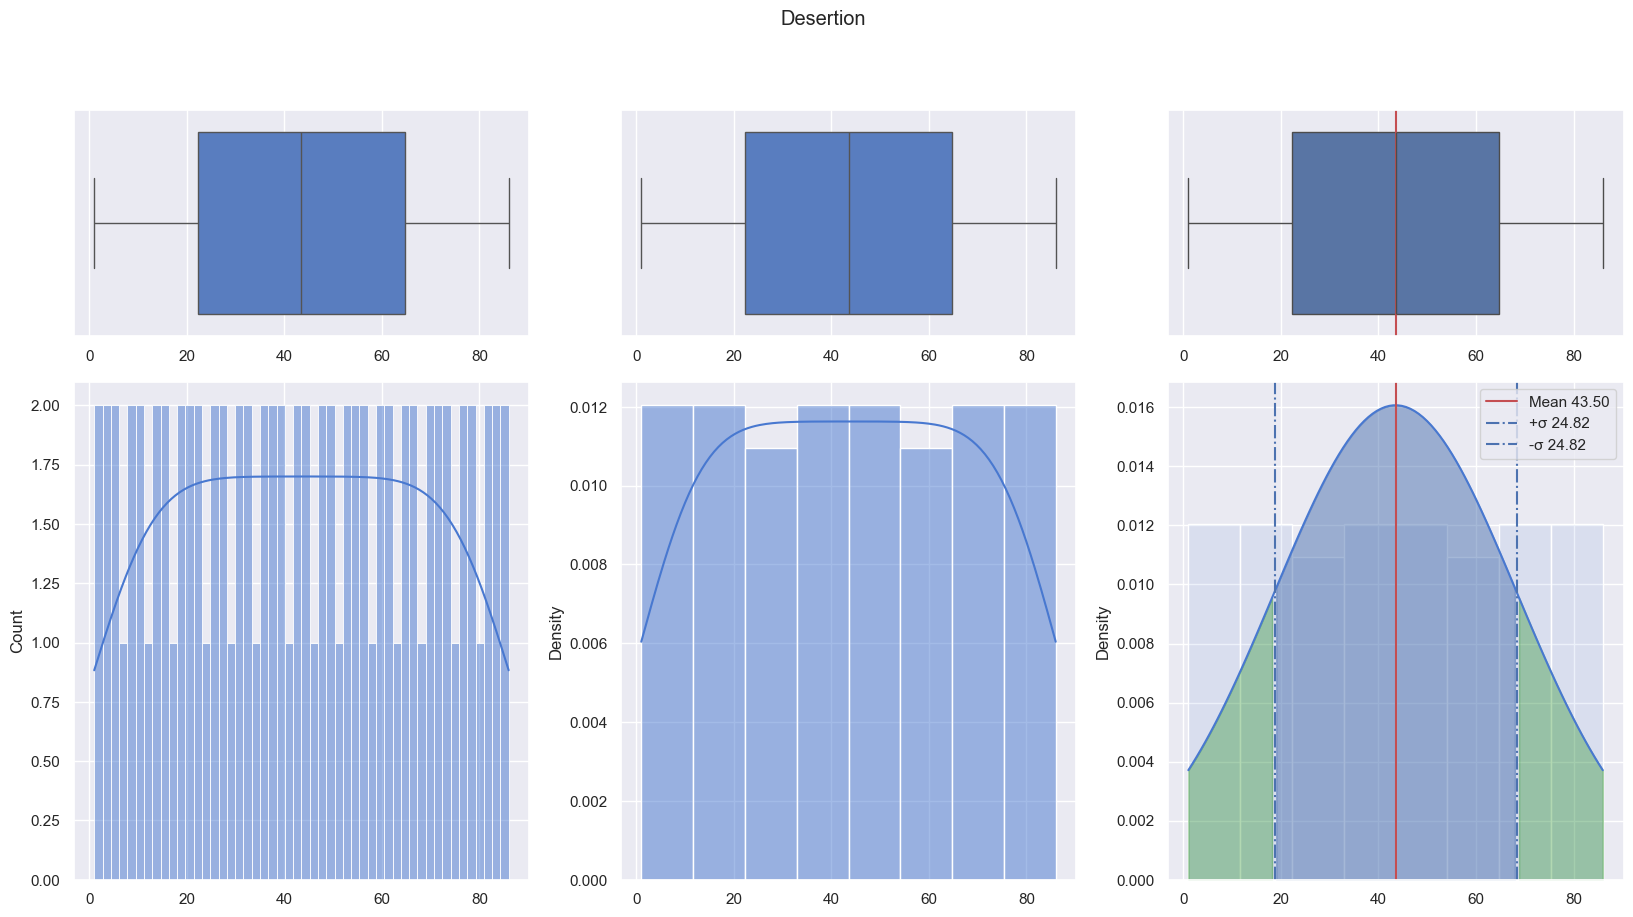

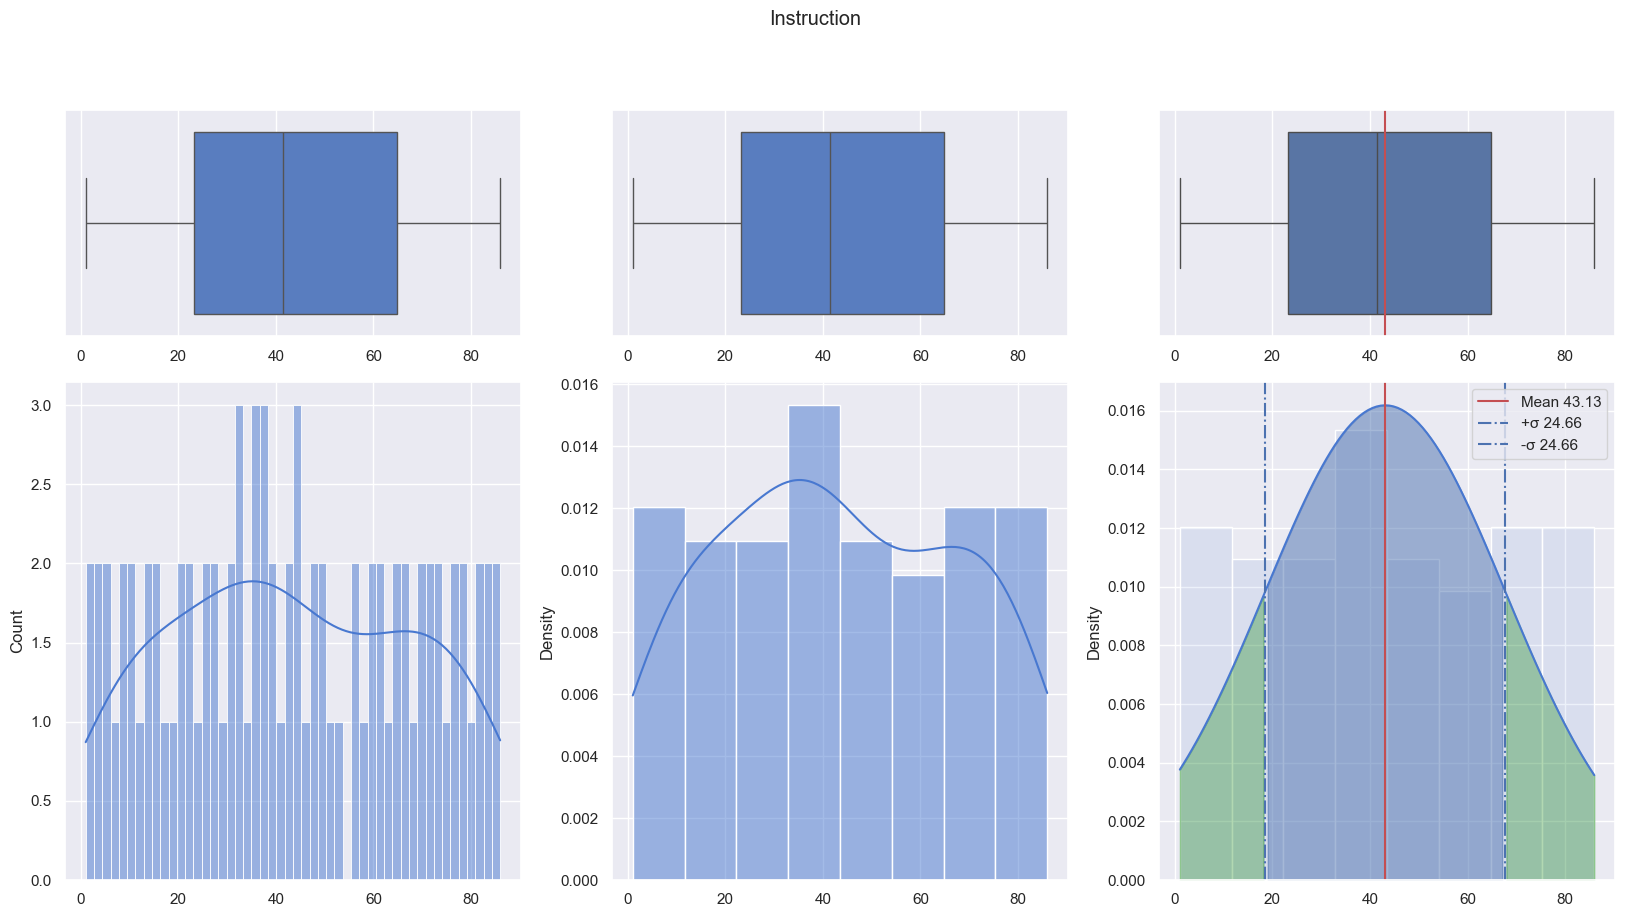

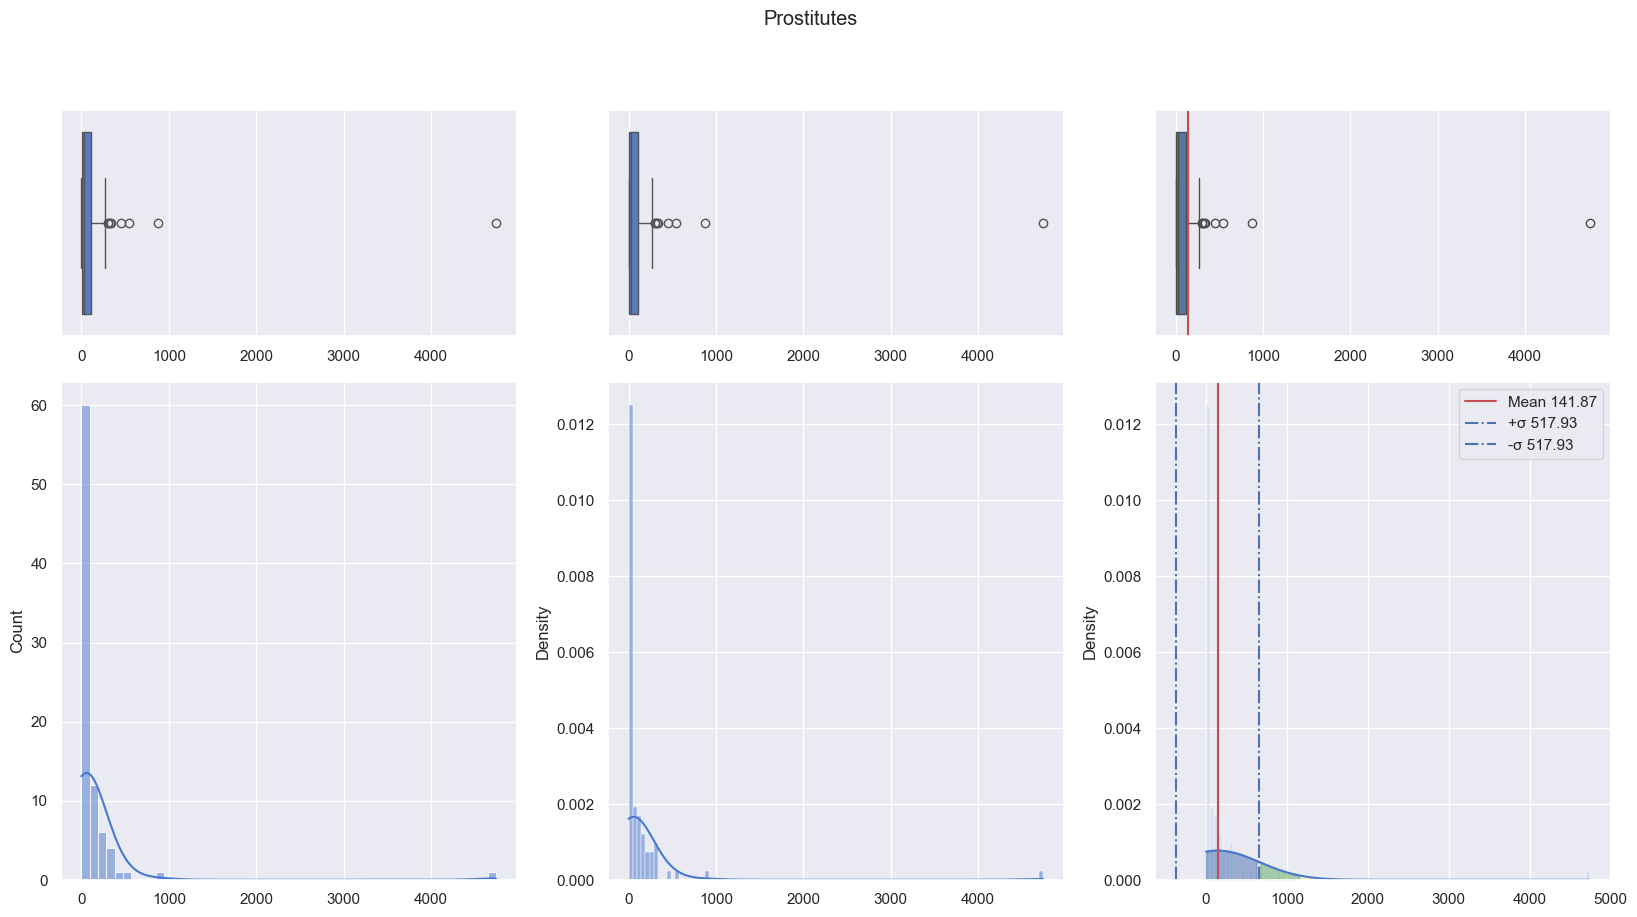

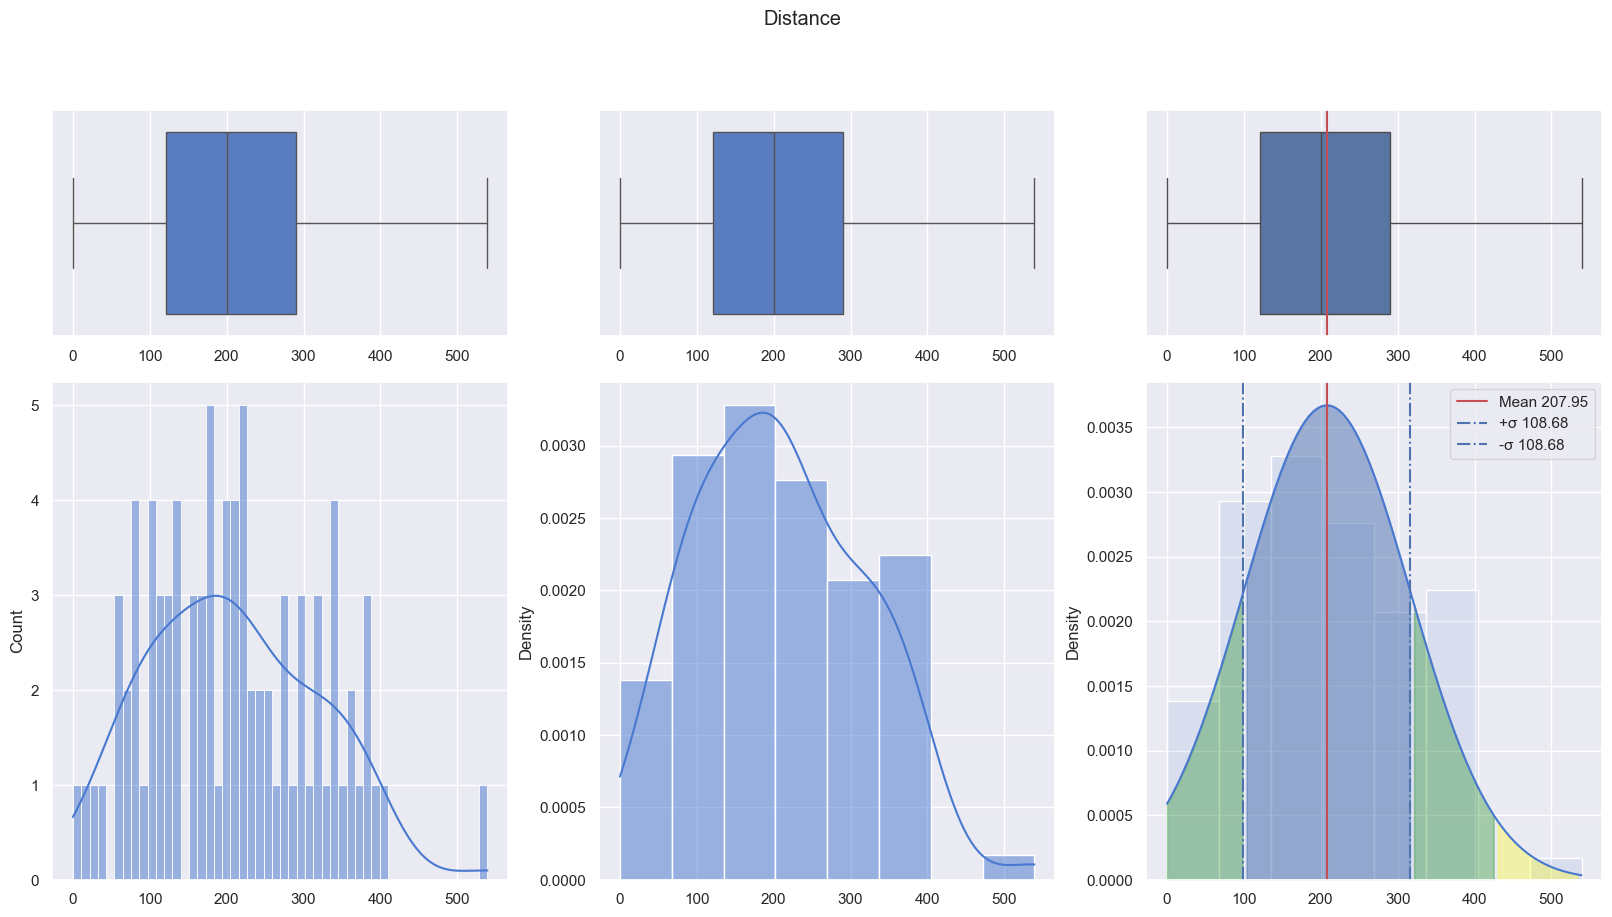

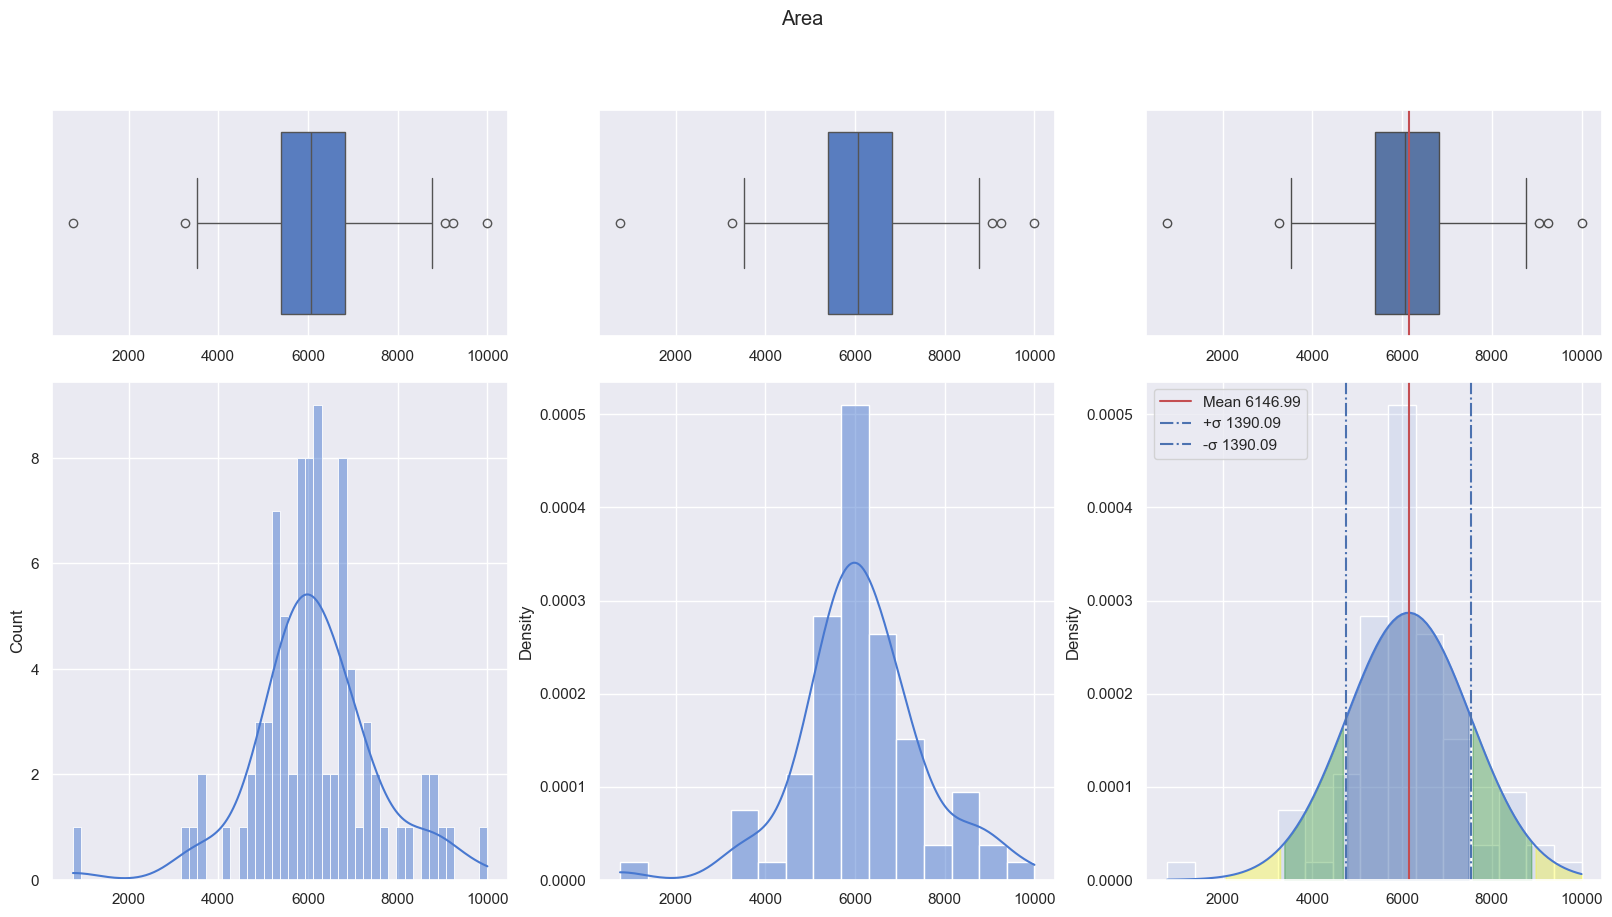

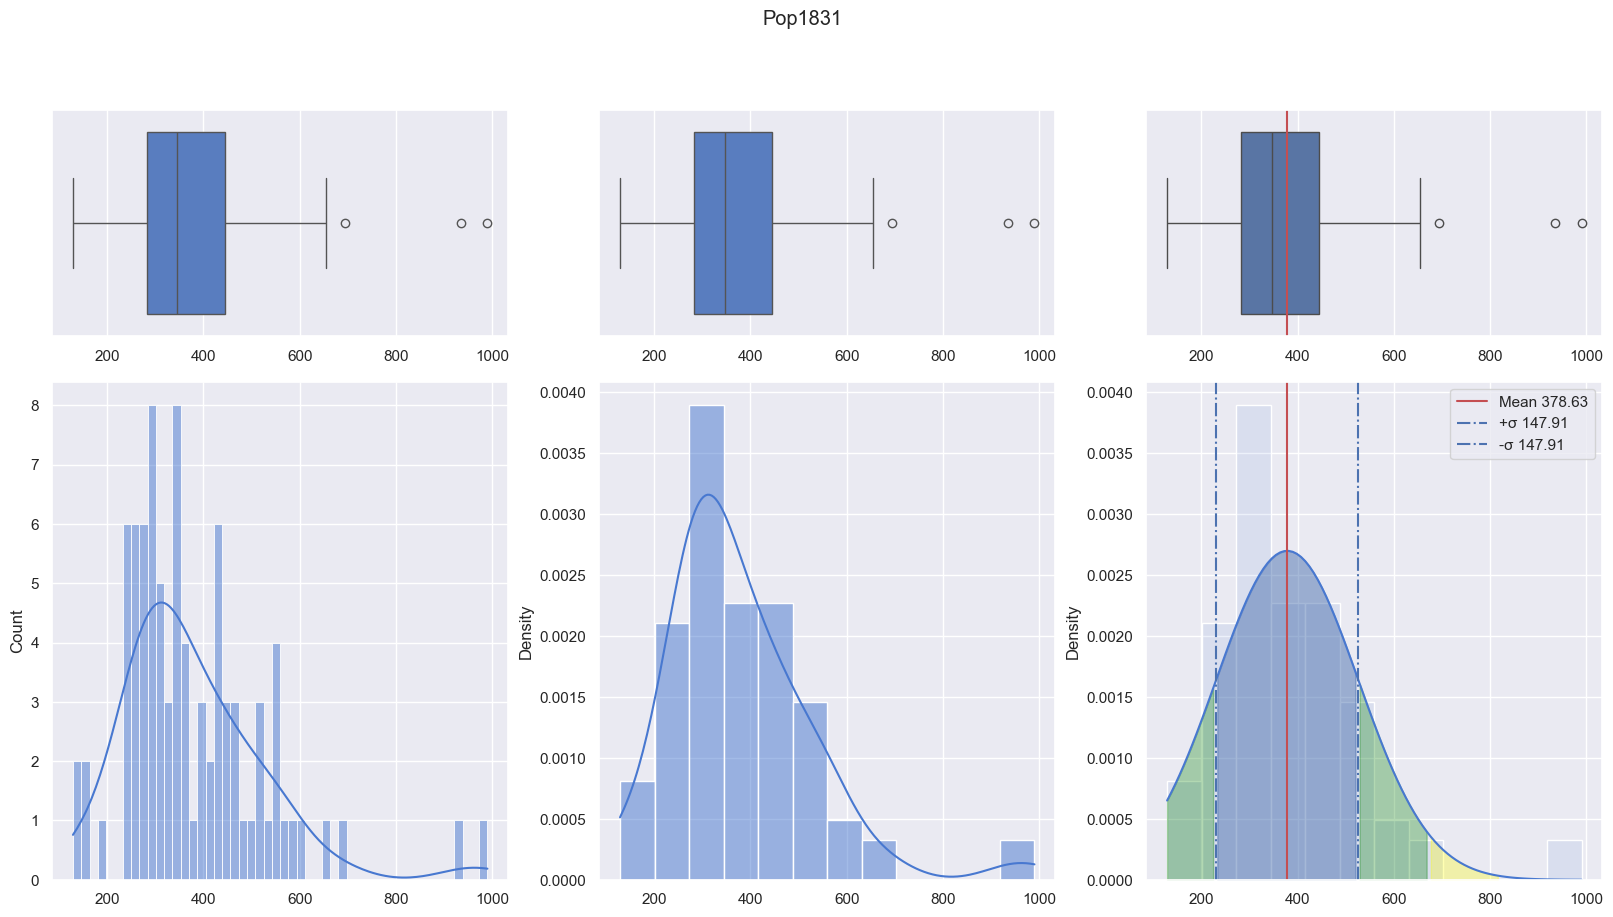

In [4]:
hist_normal(df, 50)

### Population per Crime against property (population)

Follows a normal distribution.

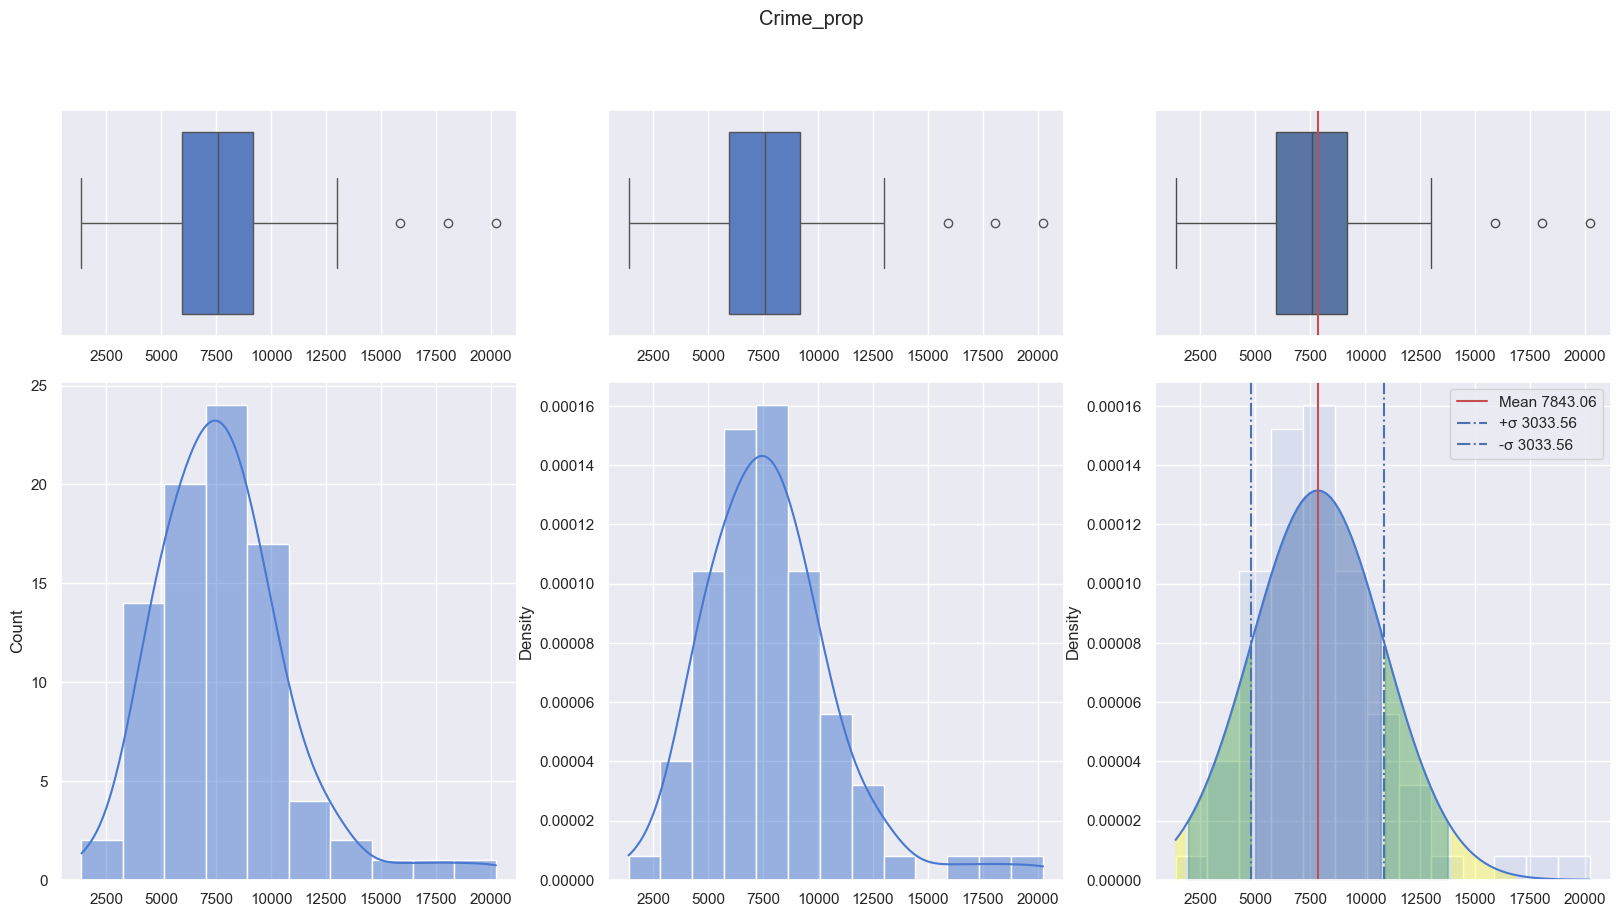

In [ ]:
hist_normal(df[['Crime_prop']], 10)

### Visualizing Sampling distribution

If an arbitrarily large number of samples, each involving multiple observations (data points), were separately used in order to compute one value of a **statistic** (such as, for example, the sample mean or sample variance) for each sample, then the **sampling distribution** is the probability distribution of the values that the statistic takes on. In many contexts, only one sample is observed, but the sampling distribution can be found theoretically.

**Mean of the Sampling Distribution**: μ<sub>x̄</sub> = μ

**Standard Deviation of the Sampling Distribution (Standard error)**: SE = σ<sub>x̄</sub> = σ / √n

**Estimated Standard Error**: SE = s / √n

**Confidence Interval**: mean ± ( t_score | z_value ) * SE

Where:
- μ: Population mean
- σ: Population standard deviation
- s: Sample standard deviation
- n: Sample size

In the following example, we have:
- in blue, the population distribution of *Population per Crime against property* for all 85 departaments in France during 1815-1834.
- in orange, the distribution of the mean of *Population per Crime against property* with the sample_size and num_samples selected.
- in green, the hypothetical distribution (**sampling distribution**) of the mean of *Population per Crime against property* with the num_samples selected.

See that:
- The mean of sampling distribution is equal to the mean of population distribution (central limit theorem)
- As we increase num_samples, our orange distribution tend to approach the theoretical sampling distribution
- The green curve represents the distribution of the mean of the variable if we considered infinite samples of size sample_size with replacement.

In [6]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_hist(df, sample_size=10, num_samples=10, bins=10, seed=42, is_sampling_dist_shown='OFF', is_exact_standard_error_shown='OFF'):
    normal_sampling_dist(df, sample_size, num_samples, bins, is_sampling_dist_shown, is_exact_standard_error_shown, seed)


_ = interact(plot_hist,
    df=fixed(df[['Crime_prop']]),
    num_samples = widgets.IntSlider(
        value = 10,
        min = 1,
        max = 500,
        step = 1
    ),
    sample_size = widgets.IntSlider(
        value = 10,
        min = 1,
        max = len(df)-1,
        step = 1
    ),
    seed = widgets.IntSlider(
        value = 10,
        min = 1,
        max = 50,
        step = 1
    ),
    is_sampling_dist_shown = widgets.ToggleButtons(
        value = 'OFF',
        options=['ON', 'OFF'],
    ),
    is_exact_standard_error_shown = widgets.ToggleButtons(
        options=['ON', 'OFF'],
    ),
    bins = widgets.IntSlider(
        value = 10,
        min = 1,
        max = 50,
        step = 1
    ),
)

interactive(children=(IntSlider(value=10, description='sample_size', max=85, min=1), IntSlider(value=10, descr…

### Visualizing Bootstrapping to Estimate Standard Error of Sample Mean

The advantage of bootstrapping is that it can provide estimates of the standard error for other statistics, for which we don't have closed form expression for the standard error, like the median.


In [ ]:
The advantage of bootstrapping is that it can provide estimates of the standard error for other statistics, for which we don't have closed form expression for the standard error.





In [5]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import pandas as pd


def plot_hist(df, sample_size, bins, is_sampling_dist_shown, is_exact_standard_error_shown, seed, num_bootstrap_samples, boostrap_samples_size):
    bootstrapping(df, sample_size, bins, is_sampling_dist_shown, is_exact_standard_error_shown, seed, num_bootstrap_samples, boostrap_samples_size)


_ = interact(plot_hist,
    df=fixed(df[['Crime_prop']]),
    num_samples = widgets.IntSlider(
        value = 10,
        min = 1,
        max = 500,
        step = 1
    ),
    sample_size = widgets.IntSlider(
        value = 10,
        min = 1,
        max = len(df)-1,
        step = 1
    ),
    seed = widgets.IntSlider(
        value = 10,
        min = 1,
        max = 50,
        step = 1
    ),
    is_sampling_dist_shown = widgets.ToggleButtons(
        value = 'ON',
        options=['ON', 'OFF'],
    ),
    is_exact_standard_error_shown = widgets.ToggleButtons(
        options=['ON', 'OFF'],
    ),
    bins = widgets.IntSlider(
        value = 10,
        min = 1,
        max = 50,
        step = 1
    ),
    num_bootstrap_samples = widgets.IntSlider(
        value = 10,
        min = 1,
        max = 100,
        step = 1
    ),
    boostrap_samples_size = widgets.IntSlider(
        value = 10,
        min = 1,
        max = 50,
        step = 1
    ),
)

interactive(children=(IntSlider(value=10, description='sample_size', max=85, min=1), IntSlider(value=10, descr…

In [4]:

def calculate_confidence_limits(confidence_level, observations=None, dof=None, mean=None, se=None):
    if(observations is None):
        return stats.t.interval(confidence_level, dof, mean, se)
    else:
        return stats.t.interval(confidence_level, len(observations)-1, np.mean(observations), stats.sem(observations)) 


def bootstrapping(df, sample_size, bins, is_sampling_dist_shown, is_exact_standard_error_shown, seed, num_bootstrap_samples, boostrap_samples_size):   
    def format_axes(fig):
        for i, ax in enumerate(fig.axes):
            ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
            ax.tick_params(labelbottom=False, labelleft=False)

    for column in df.columns:
        #if(not pd.to_numeric(df[column], errors='coerce').notnull().all()):
        #    print(f"Not numerical: {column} \n")
        #    continue
        #
        df_boostrap_samples = pd.DataFrame()

        df_sample = df[column].sample(sample_size, random_state=seed, ignore_index=True, replace=True)
        
        for i in range(num_bootstrap_samples):
            df_boostrap_samples[f's{i}'] = df_sample.sample(sample_size, random_state=seed+i, ignore_index=True, replace=True)

        if(num_bootstrap_samples>1):
            df_samples_mean = df_boostrap_samples.mean(axis=0)
        else:
            df_samples_mean = df_boostrap_samples.iloc[:, 0]

        smallest_x_diff = abs(df[column].min()-df[column].mean())
        largest_x_diff = abs(df[column].max()-df[column].mean())
        smallest_x = df[column].mean()-max(smallest_x_diff, largest_x_diff)
        largest_x = df[column].mean()+max(smallest_x_diff, largest_x_diff)

        x = np.linspace(smallest_x, largest_x, 100)

        mean_pop = df[column].mean()
        std_pop = math.sqrt((((df[column]-df[column].mean())**2).sum())/(len(df)))
        y_pop = stats.norm.pdf(x, mean_pop, std_pop)

        std_sampling_dist = std_pop/math.sqrt(sample_size)
        y_sampling_dist = stats.norm.pdf(x, mean_pop, std_sampling_dist)

        mean_sample = df_sample.mean()
        std_sample = math.sqrt((((df_sample-df_sample.mean())**2).sum())/(len(df_sample)-1))
        y_sample = stats.norm.pdf(x, mean_sample, std_sample)

        std_error_estimated = std_sample/math.sqrt(sample_size)

        mean_samples = df_samples_mean.mean()
        if(num_bootstrap_samples > 1):
            std_samples = math.sqrt((((df_samples_mean-df_samples_mean.mean())**2).sum())/(len(df_samples_mean)))
        else:
            std_samples = math.sqrt((((df_samples_mean-df_samples_mean.mean())**2).sum())/(len(df_samples_mean)-1))

        y_samples = stats.norm.pdf(x, mean_samples, std_samples)

        fig = plt.figure(figsize=(20, 15))

        gs0 = gridspec.GridSpec(1, 1, figure=fig)

        gs00 = gridspec.GridSpecFromSubplotSpec(8, 3, subplot_spec=gs0[0])
        ax1 = fig.add_subplot(gs00[:3, :])
        if(is_sampling_dist_shown == 'ON'):
            sns.lineplot(x=x, y=y_sampling_dist, ax=ax1, color='green')

            if(is_exact_standard_error_shown == 'ON'):
                lower_limit_se, upper_limit_se = calculate_confidence_limits(0.95, dof=sample_size-1, mean=mean_pop, se=std_sampling_dist)
                plt.axvline(lower_limit_se,color='green', linestyle='-.', label='CI 95% (mean_pop ± t_value*SEM)')
                plt.axvline(upper_limit_se,color='green', linestyle='-.')

        sns.lineplot(x=x, y=y_samples, ax=ax1, color='orange')
        plt.fill_between(x, y_samples, where=(x >= smallest_x) & (x <= largest_x), alpha=0.1, color='orange')

        sns.lineplot(x=x, y=y_sample, ax=ax1, color='red')
        plt.fill_between(x, y_sample, where=(x >= smallest_x) & (x <= largest_x), alpha=0.1, color='red')

        samples_confidence_lower,samples_confidence_upper  = calculate_confidence_limits(0.95, df_samples_mean)  # df is degrees of freedom
        plt.axvline(samples_confidence_lower,color='orange', linestyle='-.',)
        plt.axvline(samples_confidence_upper,color='orange', linestyle='-.',)

        samples_confidence_lower,samples_confidence_upper  = calculate_confidence_limits(0.95, df_sample)  # df is degrees of freedom
        plt.axvline(samples_confidence_lower,color='red', linestyle='-.',)
        plt.axvline(samples_confidence_upper,color='red', linestyle='-.',)

        plt.axvline(mean_pop,color='b', linestyle='-', label=f'Mean pop /  Mean samp. distr. {mean_pop:.2f}')

        ax1.set_xlim(smallest_x, largest_x)
        ax1.set_ylim(0, np.max(y_sampling_dist)*2)
    
        plt.legend()

        ax2 = fig.add_subplot(gs00[3:4, :])

        sns.stripplot(
            data=[df_sample], alpha=.4, legend=False, ax=ax2, orient='h', marker="X", jitter=0.1
        )

        sns.pointplot(
            data=[df_sample], orient='h',
            linestyle="none", color='red', 
            errorbar=(lambda x: calculate_confidence_limits(0.95, observations=x)), err_kws={"linewidth":2},capsize=.4,
            markersize=4, markeredgewidth=3, ax=ax2
        )

        ax2.set_xlim(smallest_x, largest_x)
        
        ax3 = fig.add_subplot(gs00[4:, :])

        df_samples_random = df_boostrap_samples.sample(n=min(20, df_boostrap_samples.shape[1]), axis=1, replace=False, random_state=seed)
        sns.stripplot(
            data=df_samples_random, alpha=.4, legend=False, ax=ax3, orient='h', marker="X"
        )

        sns.pointplot(
            data=df_samples_random, orient='h',
            linestyle="none", color='orange', 
            errorbar=(lambda x: calculate_confidence_limits(0.95, observations=x)), err_kws={"linewidth":2},capsize=.4,
            markersize=4, markeredgewidth=3, ax=ax3
        )
        
        ax3.set_xlim(smallest_x, largest_x)

        #format_axes(fig)